<a href="https://colab.research.google.com/github/avikumart/LLM-GenAI-Transformers-Notebooks/blob/main/DeepLearningFiles/MLS3_Monkey_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://images.pexels.com/photos/612346/pexels-photo-612346.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="720"/>
</p></center>

<center><font size=6>Monkey Species Classification</font></center>

## Problem Statement

### **Context:**
Several species of monkeys have become extinct in recent years. As a result, a wildlife sanctuary in the United States has taken an important step forward in gathering data on all species that are currently endangered. They have collected images of monkeys from several continents. However, it has become difficult for them to organize all of these images into their respective categories. They require a solution to identify these images into their relevant monkey species groups. As a data scientist, you have to create an efficient model to classify these images into their respective categories.

### **Objective:**

Building a Convolutional Neural Network model to classify the monkey species into their respective categories.

### **Data Description:**

This dataset is taken from Kaggle and it consists of the various species of monkeys.
-  Due to the large volume of data, the images were converted to the images.npy file and the labels are also placed in Labels.csv, allowing you to work on the data without being concerned about the large data volume.
- The dataset comprises of 10 monkey species.

**List of Species**
- Mantled Howler
- Patas Monkey
- Bald Monkey
- Japanese Macaque
- Pygmy Marmoset
- White Headed Capuchin
- Silver Marmosetr
- Common Squirrel Monkey
- Black Headed Night Monkey
- Nilgiri Langur


####**Note: Please use GPU runtime to execute the code efficiently**


## Installing and Importing the necessary libraries--> optional

In [ ]:
#!pip install numpy==1.25.2 pandas==2.0.3 seaborn==0.13.1 tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib==3.7.1

Note: After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.

In [2]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Input, Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the Data

In [4]:
# Uncomment and run the following code in case Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/GL_Deeplearning_notebooks/CV_w3/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/GL_Deeplearning_notebooks/CV_w3/Labels.csv')

## Data Overview


Let's print the shape of the images and labels

In [6]:
print(images.shape)
print(labels.shape)

(1342, 128, 128, 3)
(1342, 1)


There are 1342 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

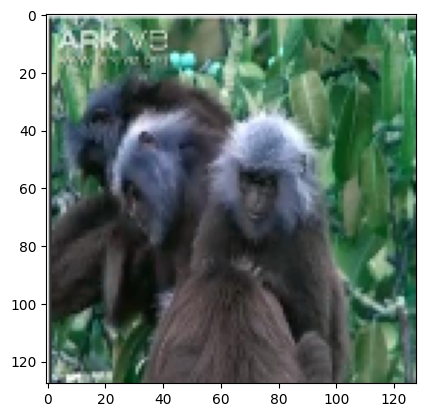

In [7]:
plt.imshow(images[5])

## Exploratory Data Analysis

In [8]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

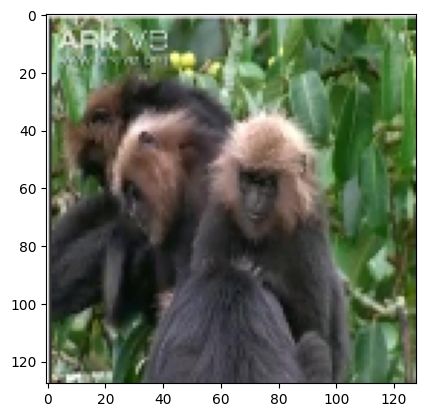

In [9]:
plt.imshow(images[5])

In [10]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

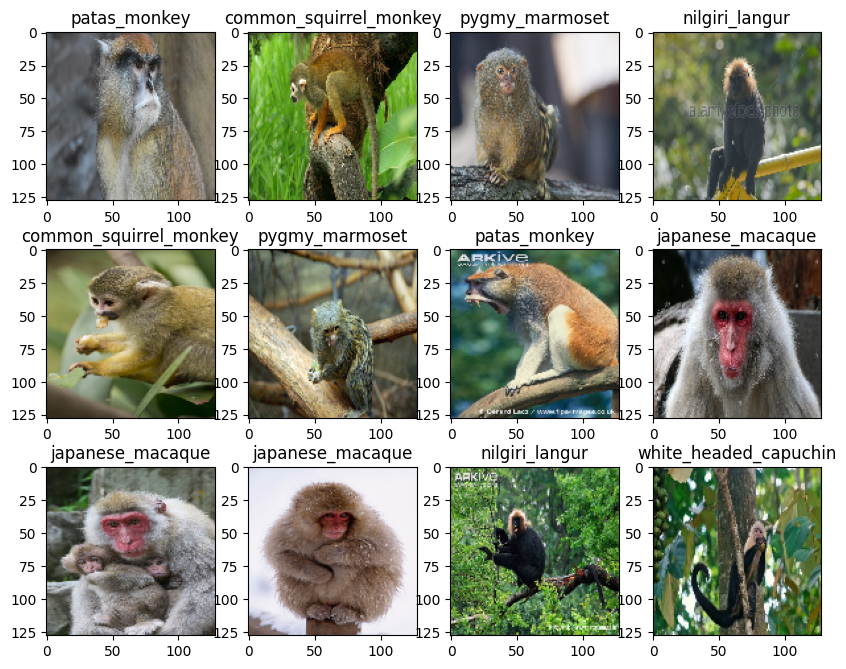

In [11]:
plot_images(images,labels)

### Checking for data imbalance

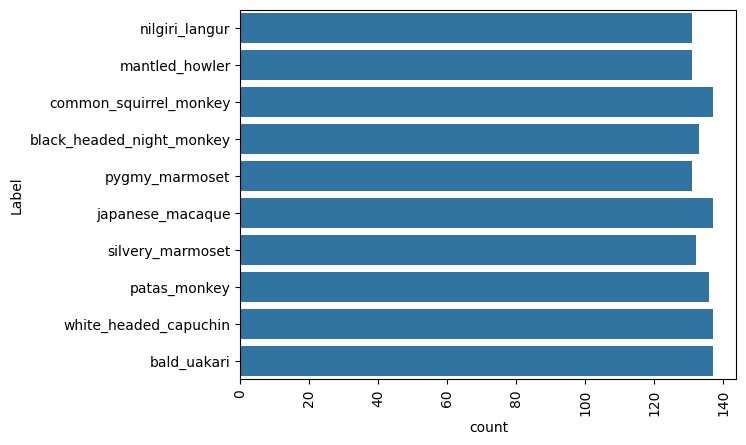

In [12]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical');

- As you can see from the above plot, the dataset is quite balanced.
- There are about 135 images in each category

## Data Preprocessing

### Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [13]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

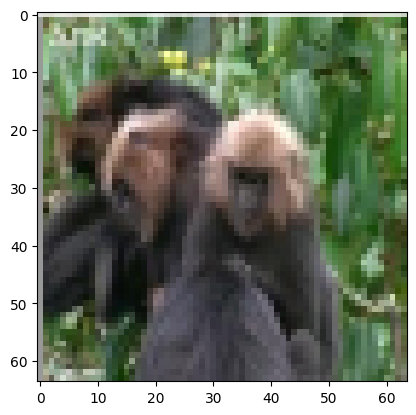

In [16]:
plt.imshow(images_decreased[5]);

### Visualizing images using Gaussian Blur

In [17]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images_decreased)):
  images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize =(3,3),sigmaX =  0))


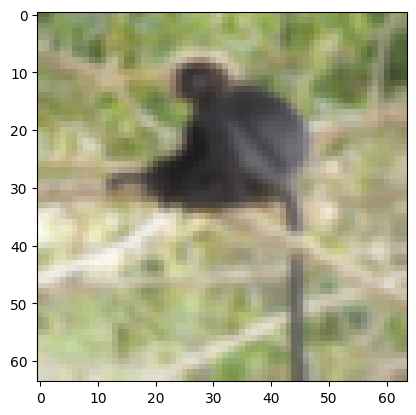

In [18]:
plt.imshow(images_gb[3]);

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

### Splitting the dataset



- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images_decreased),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [20]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(1073, 64, 64, 3) (1073, 1)
(134, 64, 64, 3) (134, 1)
(135, 64, 64, 3) (135, 1)


### Encoding the target labels

- Convert labels from names to one hot vectors


In [21]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [23]:
y_train_encoded[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [24]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

### Utility Functions

In [25]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target, ml=False):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) if ml else np.argmax(model.predict(predictors),axis=1)

    target = np.argmax(target,axis=1)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [26]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) if ml else np.argmax(model.predict(predictors),axis=1)

    target = np.argmax(target,axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

## Model Building

### Model 1 (VGG-16 (Base))

- We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer.


In [31]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [32]:
model_1 = Sequential()
model_1.add(Input(shape=(64, 64, 3)))
# Adding the convolutional part of the VGG16 model from above
model_1.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_1.add(Flatten())

# Adding a dense output layer
model_1.add(Dense(10, activation='softmax'))

In [33]:
opt=Adam()
# Compile model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Generating the summary of the model
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,735,178 (56.21 MB)

 Trainable params: 14,735,178 (56.21 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
train_datagen = ImageDataGenerator()

In [36]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = model_1.fit(X_train_normalized,y_train_encoded,batch_size=batch_size, epochs=epochs,validation_data=(X_val_normalized,y_val_encoded),verbose=1)

Epoch 1/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 199s 11s/step - accuracy: 0.1028 - loss: 2.7745 - val_accuracy: 0.0896 - val_loss: 2.3135
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 195s 11s/step - accuracy: 0.1014 - loss: 2.3184 - val_accuracy: 0.0970 - val_loss: 2.2889
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 204s 11s/step - accuracy: 0.0956 - loss: 2.3244 - val_accuracy: 0.1194 - val_loss: 2.2473
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 202s 11s/step - accuracy: 0.1336 - loss: 2.2493 - val_accuracy: 0.1045 - val_loss: 2.3271
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 182s 11s/step - accuracy: 0.1095 - loss: 2.3249 - val_accuracy: 0.1194 - val_loss: 2.2058
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 189s 11s/step - accuracy: 0.1690 - loss: 2.1473 - val_accuracy: 0.1716 - val_loss: 2.0508
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 200s 11s/step - accuracy: 0.1943 - loss: 2.0530 - val_accuracy: 0.2313 - val_loss: 1.9893
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 181s 11s/step - accuracy: 0.2006 - loss: 1.9878 - val_accuracy: 0.

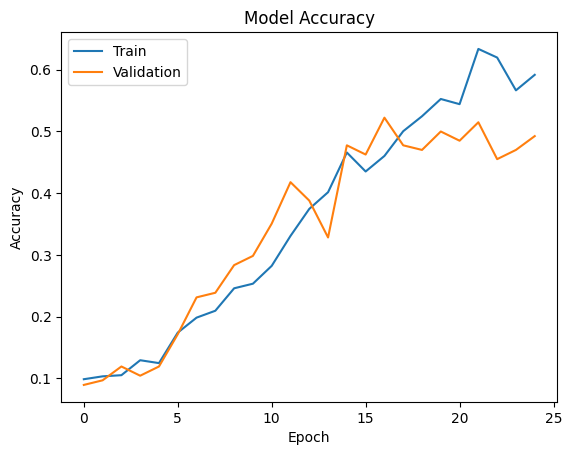

In [37]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
model_1_train_perf = model_performance_classification(model_1, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_1_train_perf)

34/34 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.642125  0.642125   0.665781  0.630882


34/34 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step


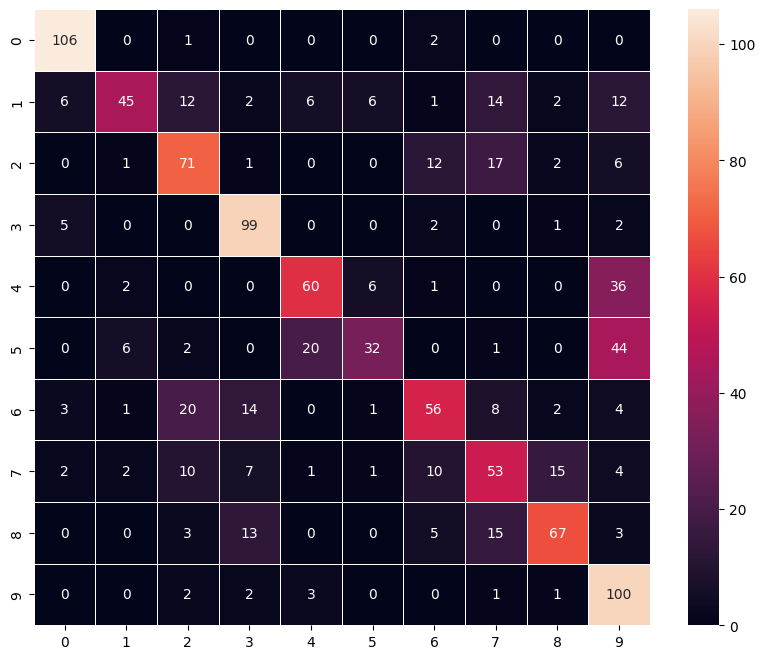

In [39]:
plot_confusion_matrix(model_1,X_train_normalized,y_train_encoded)

In [40]:
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_1_valid_perf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 994ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.492537  0.492537   0.472959  0.455013


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


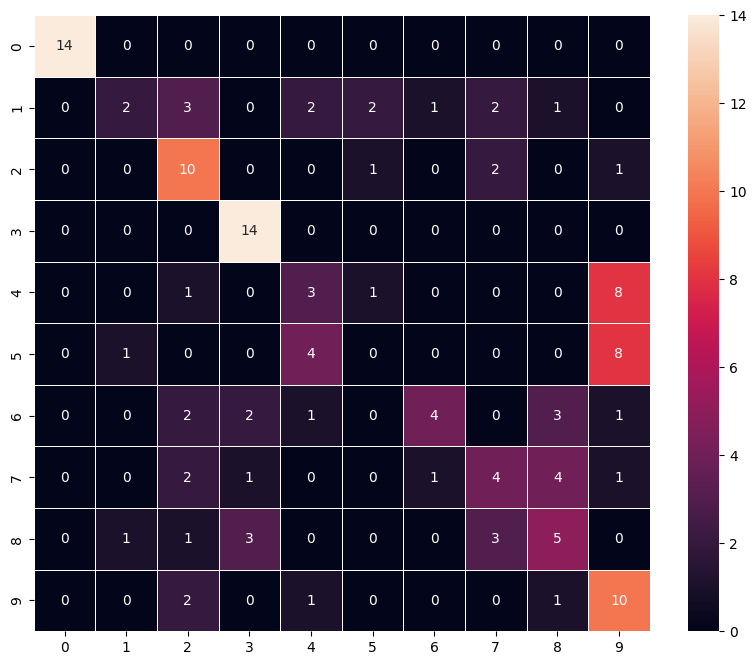

In [41]:
plot_confusion_matrix(model_1,X_val_normalized,y_val_encoded)

#### Visualizing the prediction:

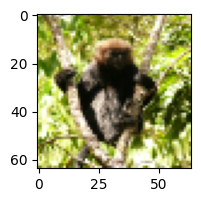

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Predicted Label ['nilgiri_langur']
True Label bald_uakari


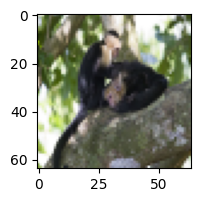

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted Label ['white_headed_capuchin']
True Label bald_uakari


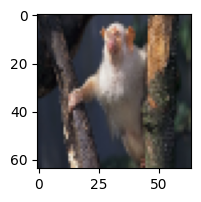

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted Label ['pygmy_marmoset']
True Label common_squirrel_monkey


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

### Model 2 (VGG-16 (Base + FFNN))

- We will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten layer and a Feed Forward Neural Network.


In [ ]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

#Adding the Feed Forward neural network
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(rate=0.4))
model_2.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_2.add(Dense(10, activation='softmax'))

In [ ]:
opt = Adam()

In [ ]:
# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history_vgg16 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.1155 - loss: 2.4065 - val_accuracy: 0.3358 - val_loss: 2.0661
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 684ms/step - accuracy: 0.2656 - loss: 2.1513 - val_accuracy: 0.3731 - val_loss: 2.0431
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.2763 - loss: 2.0281 - val_accuracy: 0.4030 - val_loss: 1.7335
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 484ms/step - accuracy: 0.2969 - loss: 1.9993 - val_accuracy: 0.3955 - val_loss: 1.7131
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.4069 - loss: 1.7534 - val_accuracy: 0.3955 - val_loss: 1.5940
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 684ms/step - accuracy: 0.4688 - loss: 1.5128 - val_accuracy: 0.4179 - val_loss: 1.5774
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.5079 - loss: 1.4361 - val_accuracy: 0.4776 - val_loss: 1.4704
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 684ms/step - accuracy: 0.4844 - loss: 1.4188 - val_accuracy: 0.4627

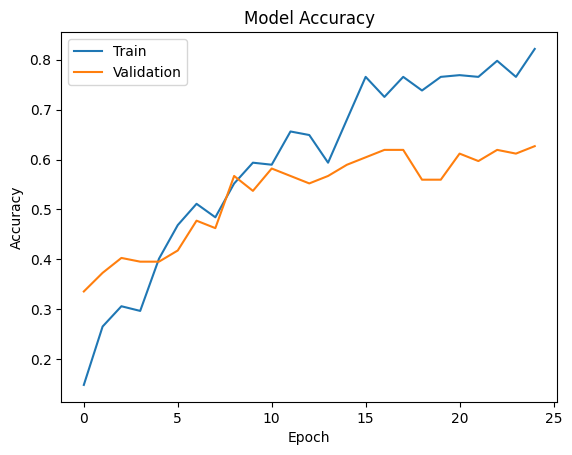

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_2_train_perf)

34/34 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.891892  0.891892   0.897362  0.892336


34/34 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step


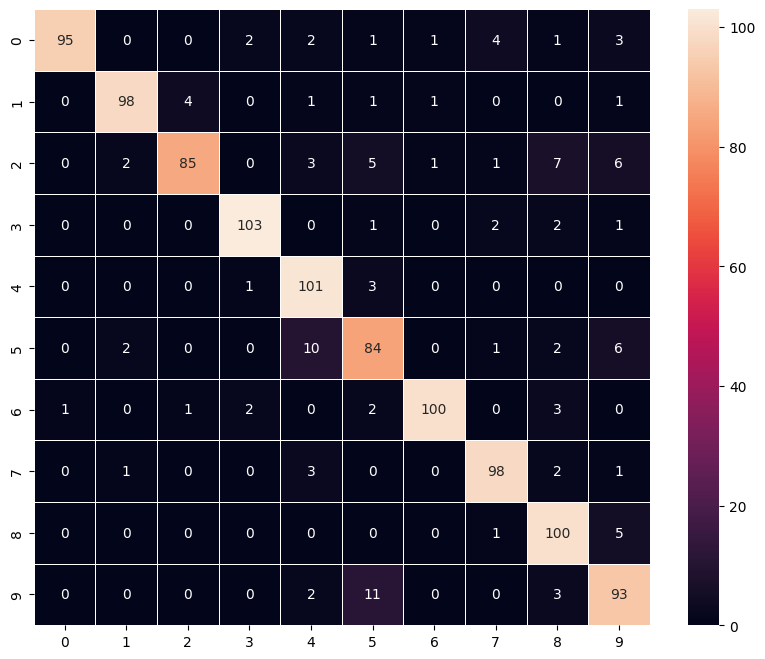

In [ ]:
plot_confusion_matrix(model_2,X_train_normalized,y_train_encoded)

In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_2_valid_perf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.626866  0.626866   0.656238  0.628228


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


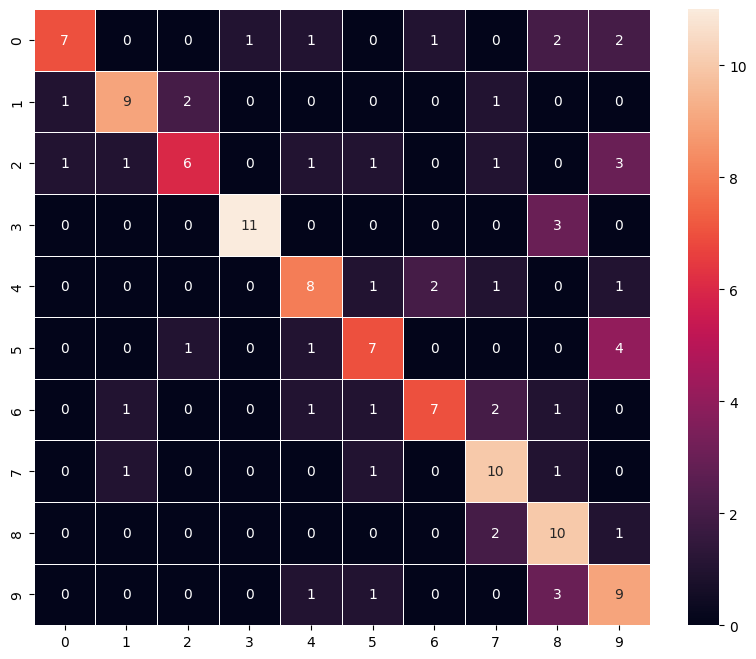

In [ ]:
plot_confusion_matrix(model_2,X_val_normalized,y_val_encoded)

#### Visualizing the prediction:

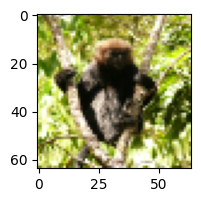

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Label ['nilgiri_langur']
True Label bald_uakari


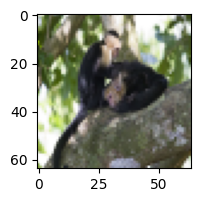

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted Label ['white_headed_capuchin']
True Label bald_uakari


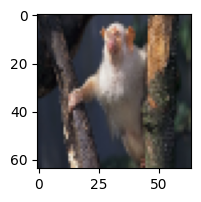

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Label ['pygmy_marmoset']
True Label common_squirrel_monkey


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

### Model 3 (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_3.add(Dense(10, activation='softmax'))

In [ ]:
opt=Adam()
# Compile model
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2,shear_range=0.3,zoom_range=0.4
                              )

In [ ]:
history_vgg16 = model_3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.1010 - loss: 2.4209 - val_accuracy: 0.2239 - val_loss: 2.1784
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 684ms/step - accuracy: 0.1719 - loss: 2.2462 - val_accuracy: 0.2239 - val_loss: 2.1761
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.1906 - loss: 2.2085 - val_accuracy: 0.3507 - val_loss: 1.9680
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 684ms/step - accuracy: 0.2653 - loss: 2.1606 - val_accuracy: 0.3209 - val_loss: 1.9567
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.2281 - loss: 2.1224 - val_accuracy: 0.3806 - val_loss: 1.8131
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 684ms/step - accuracy: 0.1224 - loss: 2.1769 - val_accuracy: 0.4030 - val_loss: 1.8029
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.2751 - loss: 1.9667 - val_accuracy: 0.3806 - val_loss: 1.7687
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 350ms/step - accuracy: 0.3281 - loss: 1.8127 - val_accuracy: 0.3881

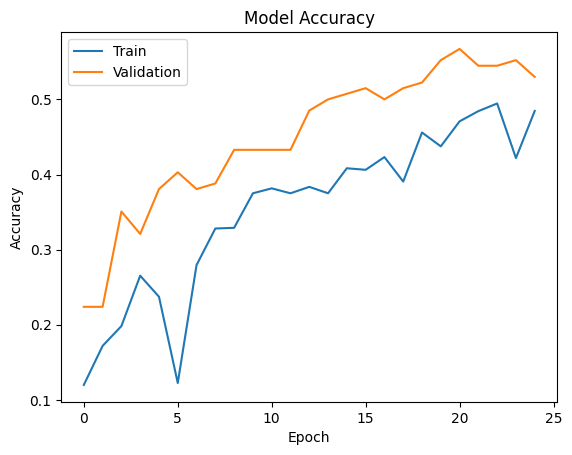

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_3_train_perf)

34/34 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.603914  0.603914   0.648082  0.586959


34/34 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step


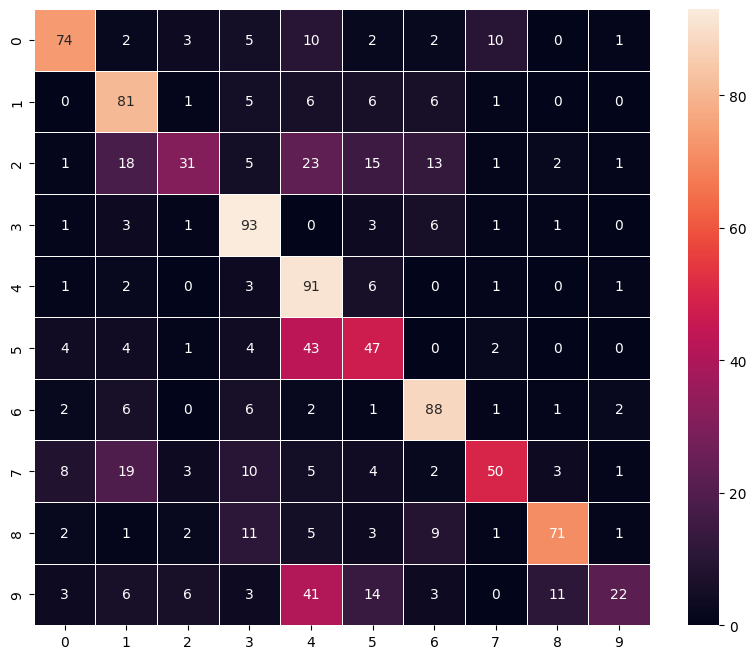

In [ ]:
plot_confusion_matrix(model_3,X_train_normalized,y_train_encoded)

In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_3_valid_perf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.529851  0.529851   0.544339  0.503715


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


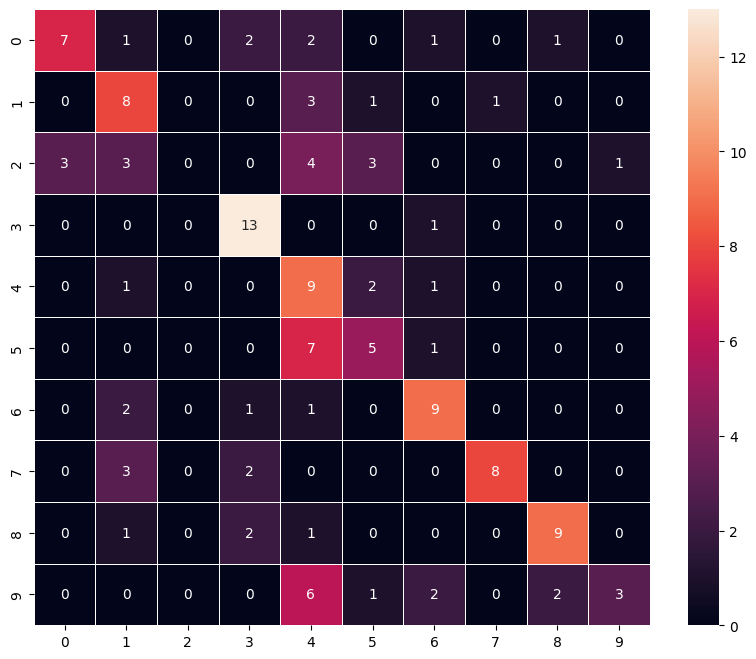

In [ ]:
plot_confusion_matrix(model_3,X_val_normalized,y_val_encoded)

#### Visualizing the prediction:

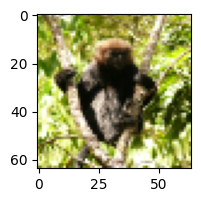

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Label ['mantled_howler']
True Label bald_uakari


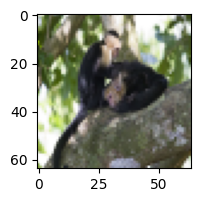

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Label ['mantled_howler']
True Label bald_uakari


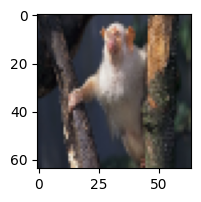

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted Label ['black_headed_night_monkey']
True Label common_squirrel_monkey


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

### Model 4 (VGG-16 Embeddings)

#### Generating Embeddings

In [ ]:
model = Sequential()

# Adding the convolutional part of the VGG16 model from above
model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
embedding_matrix = np.ones(shape=(X_train_normalized.shape[0],2048))

total_images = X_train.shape[0]

for i in range(total_images):
    embedding_matrix[i] = model.predict(np.expand_dims(X_train_normalized[i],axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
print(embedding_matrix[0])

[0.92333484 0.         1.47779906 ... 0.58515781 0.58952409 0.        ]


#### Similarity Check

In [ ]:
Y = y_train.reset_index().drop('index',axis=1)

In [ ]:
Y

,Label
0,bald_uakari
1,mantled_howler
2,pygmy_marmoset
3,bald_uakari
4,patas_monkey
...,...
1068,bald_uakari
1069,patas_monkey
1070,silvery_marmoset
1071,black_headed_night_monkey


In [ ]:
def display(index_1,index_2):

    mse_val = mse(embedding_matrix[index_1].reshape(-1),embedding_matrix[index_2].reshape(-1))

    fig, axs = plt.subplots(1, 2)

    # Display the first image
    axs[0].imshow(X_train[index_1])
    axs[0].axis('off')  # Hide the axes
    axs[0].set_title(Y.iloc[index_1]["Label"])

    # Display the second image
    axs[1].imshow(X_train[index_2])
    axs[1].axis('off')  # Hide the axes
    axs[1].set_title(Y.iloc[index_2]["Label"])

    # Show the plot
    fig.suptitle("The MSE is "+str(mse_val))
    plt.show()

- Let's check the mean squared error between the embeddings of two different species of monkeys.

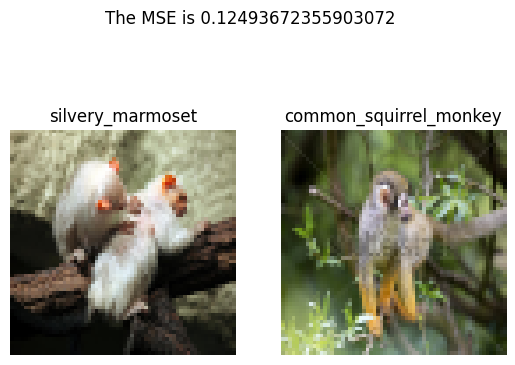

In [ ]:
display(785,923)

- Let's check the mean squared error between the embeddings of the same monkey species

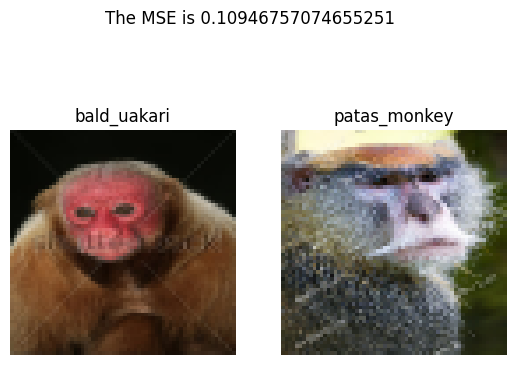

In [ ]:
display(0,4)

#### Machine Learning (SVM)

In [ ]:
from sklearn.svm import SVC

model_4 = SVC(kernel='rbf',C=0.5,probability=True)

model_4.fit(X_train_normalized.reshape(X_train_normalized.shape[0],-1), np.argmax(y_train_encoded,axis=1))

SVC(C=0.5, probability=True)

In [ ]:
model_4_train_perf = model_performance_classification(model_4,X_train_normalized.reshape(X_train_normalized.shape[0],-1), y_train_encoded,ml=True)

print("Train performance metrics")
print(model_4_train_perf)

Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.744641  0.744641    0.75897  0.742717


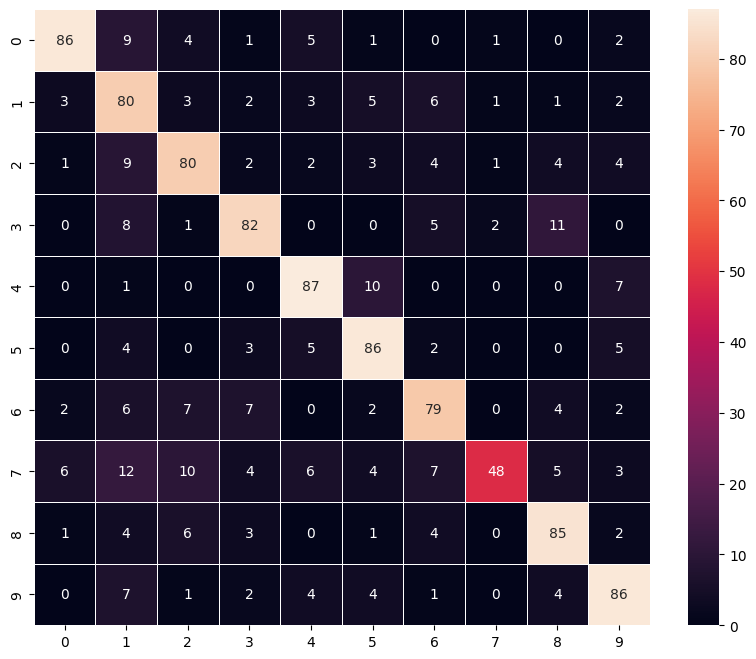

In [ ]:
plot_confusion_matrix(model_4,X_train_normalized.reshape(X_train_normalized.shape[0],-1), y_train_encoded,ml=True)

In [ ]:
model_4_valid_perf = model_performance_classification(model_4,X_val_normalized.reshape(X_val_normalized.shape[0],-1),y_val_encoded,ml=True)

print("Validation performance metrics")
print(model_4_valid_perf)

Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.589552  0.589552   0.588463  0.564177


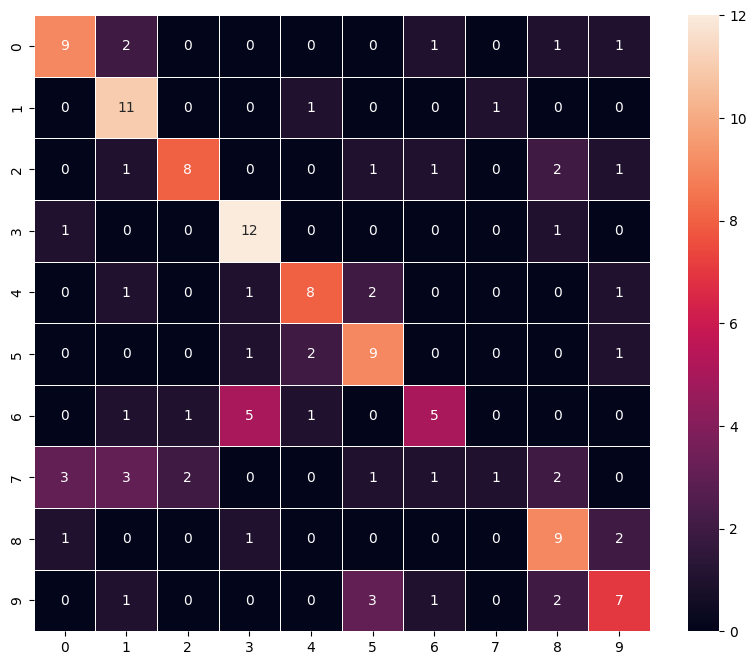

In [ ]:
plot_confusion_matrix(model_4,X_val_normalized.reshape(X_val_normalized.shape[0],-1),y_val_encoded,ml=True)

##### Visualizing the prediction:

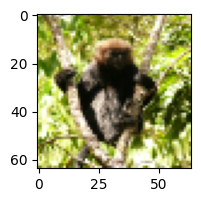

Predicted Label ['mantled_howler']
True Label bald_uakari


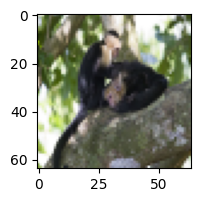

Predicted Label ['white_headed_capuchin']
True Label bald_uakari


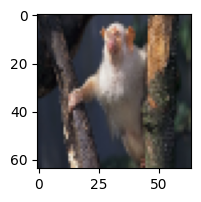

Predicted Label ['silvery_marmoset']
True Label common_squirrel_monkey


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_4.predict_proba(X_val_normalized[2].reshape(1,-1)))  )
print('True Label', enc.inverse_transform(y_test_encoded)[2])

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_4.predict_proba((X_val_normalized[33].reshape(1,-1)))) )
print('True Label', enc.inverse_transform(y_test_encoded)[33])

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_4.predict_proba((X_val_normalized[36].reshape(1,-1)))) )
print('True Label', enc.inverse_transform(y_test_encoded)[36])

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)","SVM"
]

In [ ]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)","SVM"
]

In [ ]:
models_train_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug),SVM
Accuracy,0.929171,0.891892,0.603914,0.744641
Recall,0.929171,0.891892,0.603914,0.744641
Precision,0.930136,0.897362,0.648082,0.758970
F1 Score,0.929277,0.892336,0.586959,0.742717


In [ ]:
models_valid_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug),SVM
Accuracy,0.626866,0.626866,0.529851,0.589552
Recall,0.626866,0.626866,0.529851,0.589552
Precision,0.640872,0.656238,0.544339,0.588463
F1 Score,0.623400,0.628228,0.503715,0.564177


In [ ]:
models_train_comp_df - models_valid_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug),SVM
Accuracy,0.302305,0.265026,0.074064,0.155089
Recall,0.302305,0.265026,0.074064,0.155089
Precision,0.289263,0.241123,0.103743,0.170507
F1 Score,0.305877,0.264108,0.083244,0.178540


- We'll move ahead with the SVM model with VGG-16 embeddings as our final model.

### Test Performance

In [ ]:
model_4_test_perf = model_performance_classification(model_4, X_test_normalized.reshape(X_test_normalized.shape[0],-1),y_test_encoded,ml=True)

In [ ]:
model_4_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.437037,0.437037,0.406842,0.410183


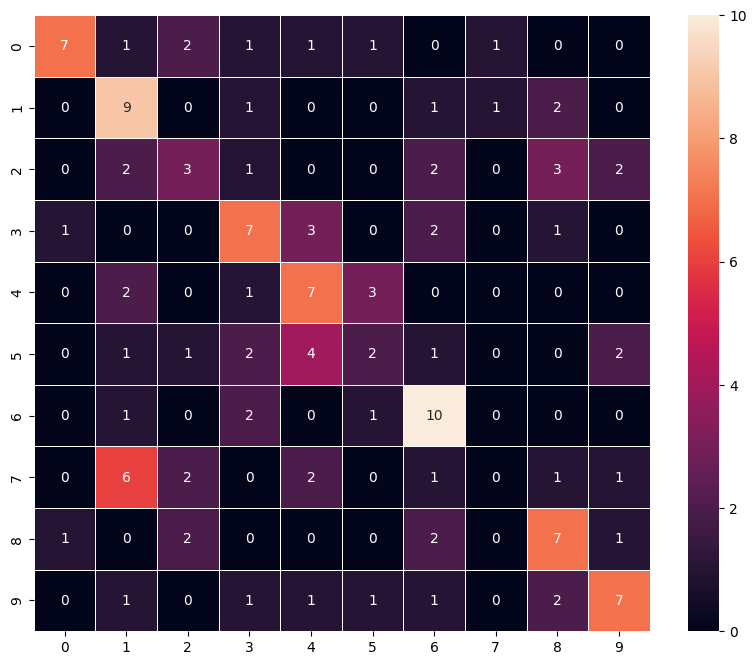

In [ ]:
plot_confusion_matrix(model_4, X_test_normalized.reshape(X_test_normalized.shape[0],-1),y_test_encoded,ml=True)

## Conclusions ##

- The VGG-16 (Base) model performed well on the training data, achieving a train F1-score of 0.92 and a validation F1-score of 0.62. This indicates that the pre-trained features were quite valuable for this dataset.

- Adding a feed-forward neural network on top of the VGG-16 model significantly improved performance. This suggests that while the pre-trained features were beneficial, further refining them with an additional neural network tailored to our dataset enhanced the results.

- However, both the VGG-16-based models are experiencing overfitting. To address this, data augmentation techniques can be applied as a form of regularization.

- Although the performance of Model 3 is not on par with Models 1 and 2, it does not suffer from overfitting.

- The SVM model also performed well, demonstrating that machine learning models can be effective on image data when high-quality features are used.

 Scope of Improvement
- These models can be further improved by training with different filter sizes and different number of filters.
- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.
- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.
- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.